In [1]:
%matplotlib inline
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors, datasets
import seaborn as sns
from sklearn.model_selection import  GridSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier

from sklearn import neighbors 
from sklearn.metrics import precision_score, recall_score,roc_auc_score, accuracy_score, f1_score, make_scorer, roc_curve

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('data.csv',index_col =0)

# Virsualizing data

In [3]:
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [4]:
df.head(20)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0
6,105,8,1,34.0,0,1,14,31,19,12,3,1,0,0
7,13,8,1,37.0,1,0,14,31,19,12,3,1,6,0
8,13,8,1,39.0,1,0,14,31,19,12,3,1,5,0
9,13,8,1,56.0,1,0,14,31,19,12,3,1,4,0


In [5]:
X = df.loc[:, df.columns != 'result']
y = df['result']
accuracy_list = []
precision_list = []
recall_list = []
f1score_list = []
roc_list = []
model_list = []
model_names=[]

In [6]:
y

0      1
1      0
2      0
3      0
4      0
      ..
858    1
859    0
860    0
861    0
862    0
Name: result, Length: 863, dtype: int64

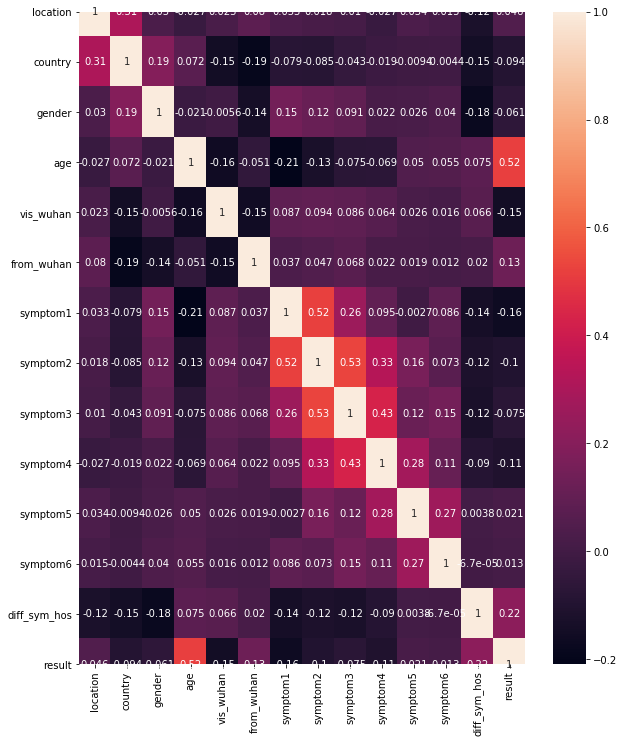

In [7]:
#Checking the correlation between features
correlation = df.corr()
fig, ax = plt.subplots(figsize=(10,12))
ax = sns.heatmap(correlation, annot=True)

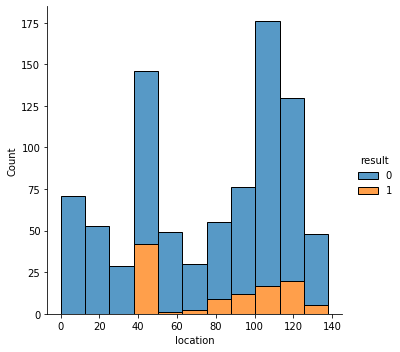

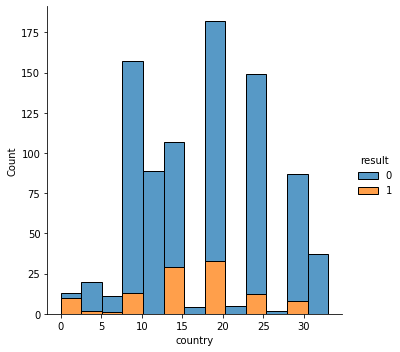

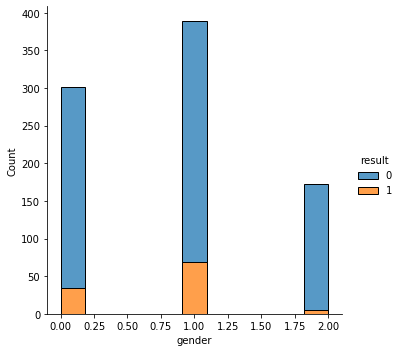

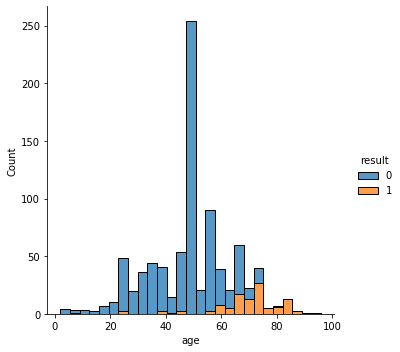

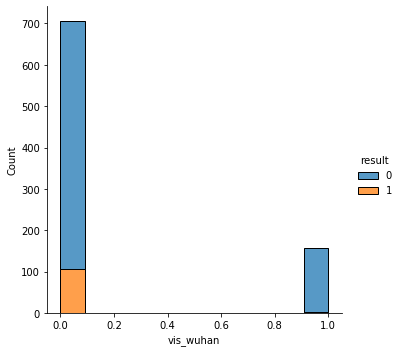

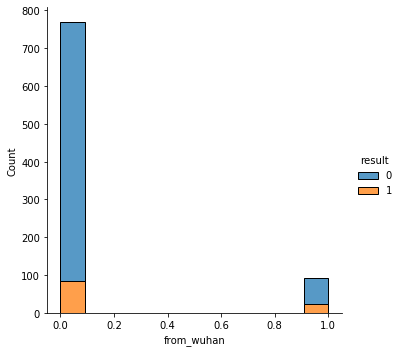

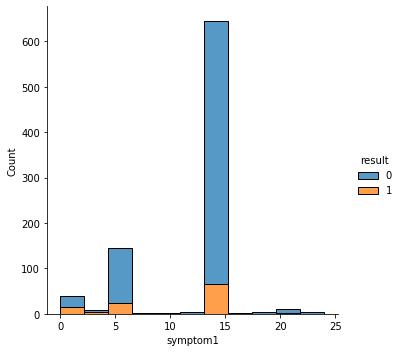

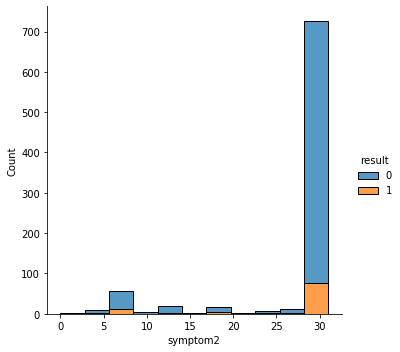

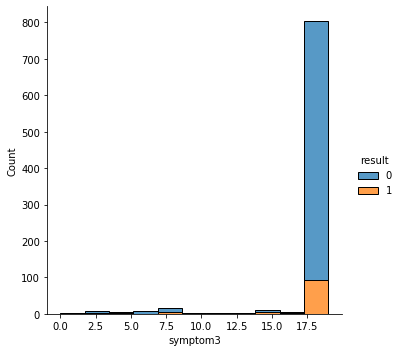

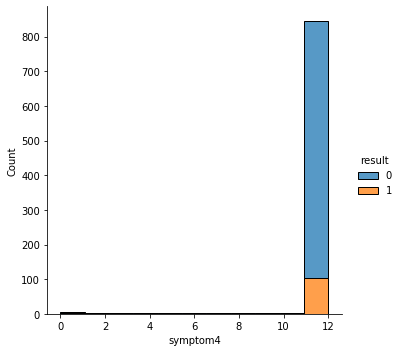

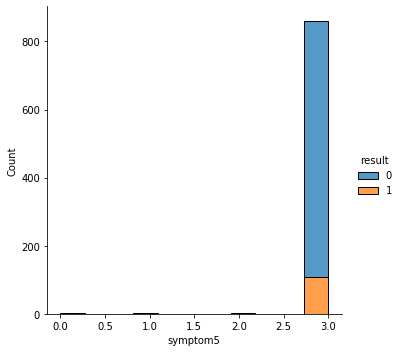

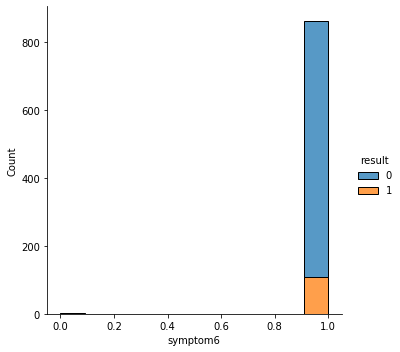

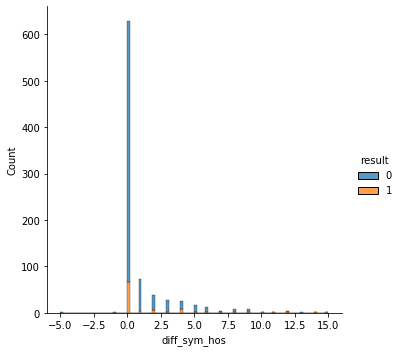

In [8]:
for i in range(13):
   sns.displot(df, x=df.columns[i],hue='result',multiple="stack")

In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
Xtr, Xts, Ytr, Yts = train_test_split(X, y, test_size=0.3, random_state=3,shuffle=False)
#Splitting testing set into test set and validation set
Xval, Xts,Yval,Yts=train_test_split(Xts, Yts, test_size=0.5, random_state=8,shuffle=False)

In [10]:
def getScore(Model,X, Y):
    
    global accuracy_list
    global precision_list
    global recall_list
    global f1score_list
    global roc_list
    
    
    
    y_pred = Model.predict(X)
    
    precision= precision_score(Y, y_pred,average='binary')
    recall = recall_score(Y,y_pred,average='binary')
    roc_auc = roc_auc_score(Y, y_pred)
    F1 = f1_score(Y, y_pred)
    Accuracy=accuracy_score(Y, y_pred)
    
    
    precision_list.append(precision)
    recall_list.append(recall)
    roc_list.append(roc_auc)
    f1score_list.append(F1)
    accuracy_list.append(Accuracy)
    model_list.append(Model)
    
    
    
    
    print('Accuracy: %.3f' % Accuracy)
    print('Precision: %.3f' % precision)
    print('Recall: %.3f' % recall)
    print('ROC: %.3f' % roc_auc)
    print('F1 score: %.3f' % F1)
    
    
    fpr, tpr, _ = roc_curve(Y,  y_pred)
    auc = roc_auc_score(Y, y_pred)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print(y_pred)
    
    
    cm = confusion_matrix(Y, y_pred, labels=Model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Model.classes_)
    disp.plot()
    
    return

# Before using one-hot encoding



# KNN Classifier

In [11]:
import sklearn.metrics as metrics
klist=range(1,30)
score={}
score_list=[]
for k in klist:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtr, Ytr)
    y_pred = knn.predict(Xval)
    score[k]=metrics.accuracy_score(Yval, y_pred)
    score_list.append(metrics.accuracy_score(Yval, y_pred))

Text(0, 0.5, 'ACCURACY')

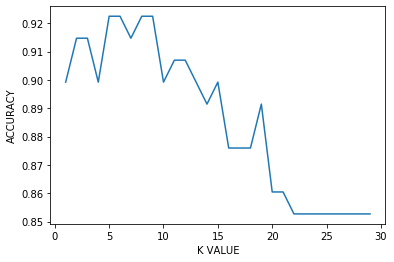

In [12]:
#Finding the best K with the highest accuracy
plt.plot(klist,score_list)
plt.xlabel('K VALUE')
plt.ylabel('ACCURACY')

Accuracy: 0.922
Precision: 0.812
Recall: 0.650
ROC: 0.811
F1 score: 0.722
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0]


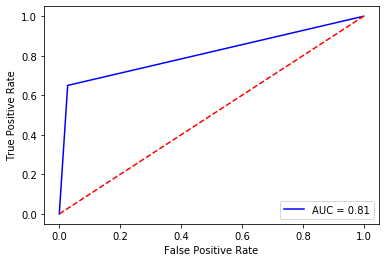

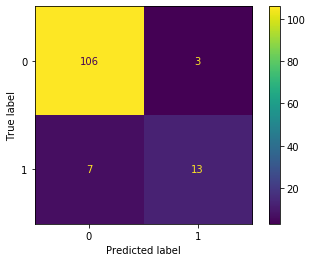

In [13]:
knn=KNeighborsClassifier(n_neighbors=5,weights="distance")
#Train the model using the training sets
knn.fit(Xtr, Ytr)
getScore(knn,Xval,Yval)

Accuracy: 0.931
Precision: 1.000
Recall: 0.400
ROC: 0.700
F1 score: 0.571
[0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


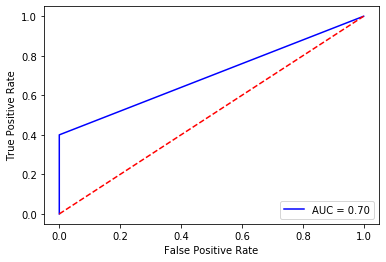

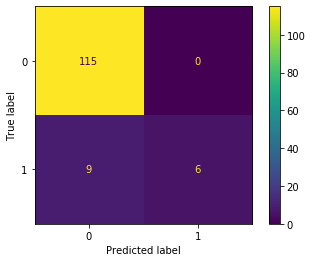

In [14]:
getScore(knn,Xts,Yts)

# Logistic Regression

Accuracy: 0.930
Precision: 1.000
Recall: 0.550
ROC: 0.775
F1 score: 0.710
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0]


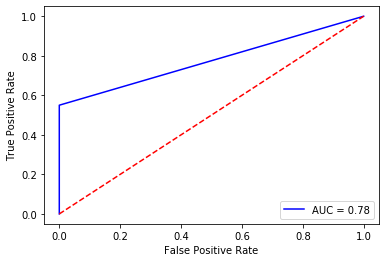

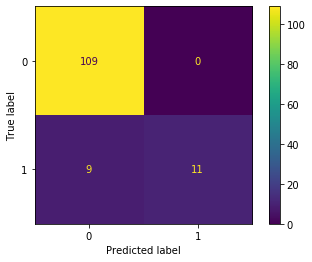

In [15]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state=0,solver='lbfgs',max_iter=1200000)
LogReg.fit(Xtr,Ytr)
getScore(LogReg,Xval,Yval)

Accuracy: 0.923
Precision: 0.857
Recall: 0.400
ROC: 0.696
F1 score: 0.545
[0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


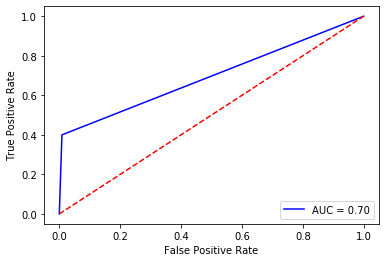

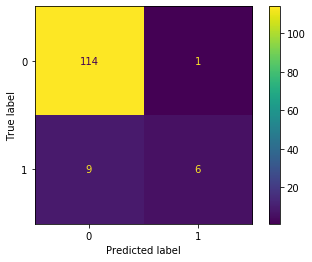

In [16]:
getScore(LogReg,Xts,Yts)

# Decision Tree

In [17]:
from sklearn import tree

depthlist=range(1,10)
depthscore={}
depthscore_list=[]
for depth in depthlist:
    clf=tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(Xtr, Ytr)
    y_pred = clf.predict(Xval)
    depthscore[depth]=metrics.accuracy_score(Yval, y_pred)
    depthscore_list.append(metrics.accuracy_score(Yval, y_pred))

Text(0, 0.5, 'ACCURACY')

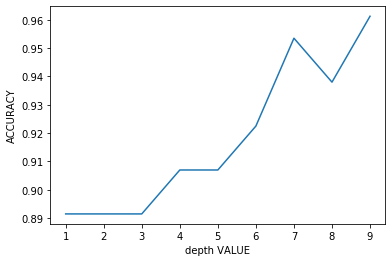

In [18]:
plt.plot(depthlist,depthscore_list)
plt.xlabel('depth VALUE')
plt.ylabel('ACCURACY')

Accuracy: 0.961
Precision: 0.941
Recall: 0.800
ROC: 0.895
F1 score: 0.865
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0]


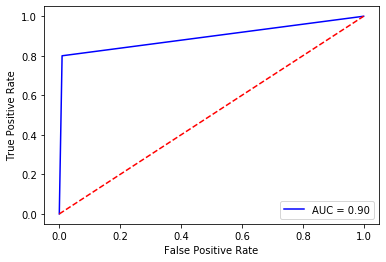

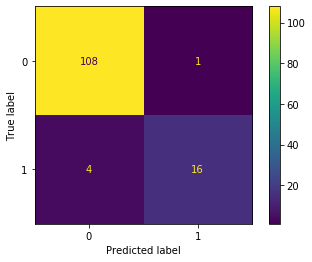

In [19]:
clf = tree.DecisionTreeClassifier(max_depth=8)
clf.fit(Xtr,Ytr)
getScore(clf,Xval,Yval)

Accuracy: 0.800
Precision: 0.323
Recall: 0.667
ROC: 0.742
F1 score: 0.435
[0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]


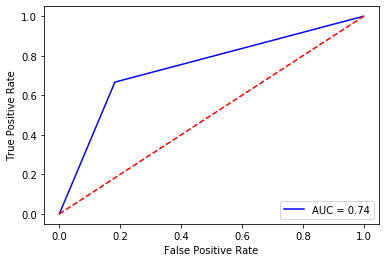

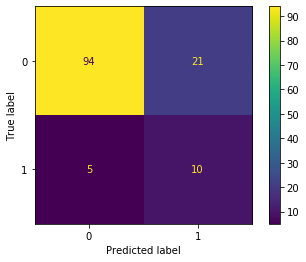

In [20]:
getScore(clf,Xts,Yts)

# SVM

C:\Users\Purple\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.845
Precision: 0.000
Recall: 0.000
ROC: 0.500
F1 score: 0.000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


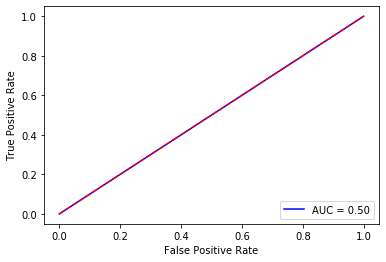

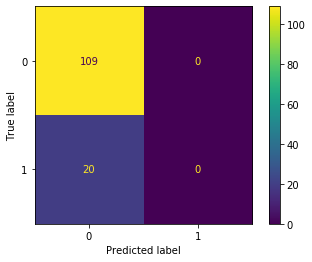

In [21]:
from sklearn import svm
SVMmodel = svm.SVC(gamma='auto')
SVMmodel.fit(Xtr,Ytr)
getScore(SVMmodel,Xval,Yval)

C:\Users\Purple\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.885
Precision: 0.000
Recall: 0.000
ROC: 0.500
F1 score: 0.000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


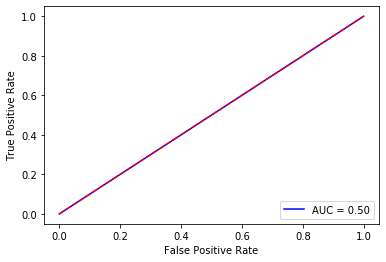

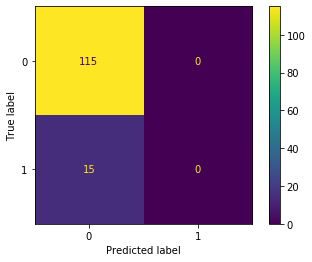

In [22]:
getScore(SVMmodel,Xts,Yts)

In [23]:
from sklearn.preprocessing import StandardScaler

Xtr = (StandardScaler().fit(Xtr)).transform(Xtr)
Xts = (StandardScaler().fit(Xts)).transform(Xts)
Xval =(StandardScaler().fit(Xval)).transform(Xval)

# Naiive Bayes Classifier

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xtr = scaler.fit_transform(Xtr)
Xts = scaler.fit_transform(Xts)
Xval=scaler.fit_transform(Xval)

Accuracy: 0.853
Precision: 0.517
Recall: 0.750
ROC: 0.811
F1 score: 0.612
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0]


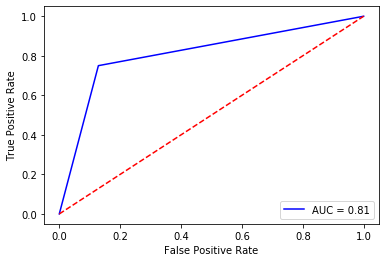

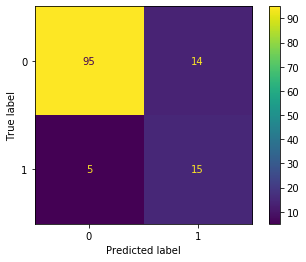

In [25]:
from sklearn.naive_bayes import ComplementNB
gnb = ComplementNB()
gnb.fit(Xtr,Ytr)
getScore(gnb,Xval,Yval)

Accuracy: 0.931
Precision: 0.800
Recall: 0.533
ROC: 0.758
F1 score: 0.640
[0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


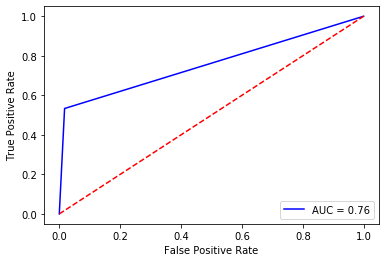

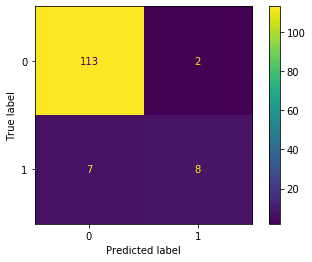

In [26]:
getScore(gnb,Xts,Yts)

# After one-hot encoding & Scaling the data

In [27]:
df = pd.read_csv('data.csv',index_col =0)
df = pd.get_dummies(df, columns = ['gender','location', 'country','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6'])

In [28]:
df.describe()

,age,vis_wuhan,from_wuhan,diff_sym_hos,result,gender_0,gender_1,gender_2,location_0,location_1,...,symptom4_9,symptom4_10,symptom4_11,symptom4_12,symptom5_0,symptom5_1,symptom5_2,symptom5_3,symptom6_0,symptom6_1
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,...,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,49.400000,0.181924,0.107764,0.995365,0.125145,0.349942,0.450753,0.199305,0.001159,0.008111,...,0.002317,0.001159,0.001159,0.977984,0.001159,0.001159,0.001159,0.996524,0.001159,0.998841
std,15.079203,0.386005,0.310261,2.358767,0.331075,0.477228,0.497857,0.399709,0.034040,0.089748,...,0.048112,0.034040,0.034040,0.146821,0.034040,0.034040,0.034040,0.058891,0.034040,0.034040
min,2.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,49.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,57.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,96.000000,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df.head(20)

,age,vis_wuhan,from_wuhan,diff_sym_hos,result,gender_0,gender_1,gender_2,location_0,location_1,...,symptom4_9,symptom4_10,symptom4_11,symptom4_12,symptom5_0,symptom5_1,symptom5_2,symptom5_3,symptom6_0,symptom6_1
0,66.0,1,0,8,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,56.0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,46.0,0,1,13,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,60.0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,58.0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
5,44.0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
6,34.0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
7,37.0,1,0,6,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
8,39.0,1,0,5,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
9,56.0,1,0,4,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [30]:
X = df.loc[:, df.columns != 'result']
y = df['result']

In [31]:
X.head()

,age,vis_wuhan,from_wuhan,diff_sym_hos,gender_0,gender_1,gender_2,location_0,location_1,location_2,...,symptom4_9,symptom4_10,symptom4_11,symptom4_12,symptom5_0,symptom5_1,symptom5_2,symptom5_3,symptom6_0,symptom6_1
0,66.0,1,0,8,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,56.0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,46.0,0,1,13,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,60.0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,58.0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [32]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: result, dtype: int64

In [33]:
df.head()

,age,vis_wuhan,from_wuhan,diff_sym_hos,result,gender_0,gender_1,gender_2,location_0,location_1,...,symptom4_9,symptom4_10,symptom4_11,symptom4_12,symptom5_0,symptom5_1,symptom5_2,symptom5_3,symptom6_0,symptom6_1
0,66.0,1,0,8,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,56.0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,46.0,0,1,13,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,60.0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,58.0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [34]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
Xtr, Xts, Ytr, Yts = train_test_split(X, y, test_size=0.3, random_state=3,shuffle=False)
#Splitting testing set into test set and validation set
Xval, Xts,Yval,Yts=train_test_split(Xts, Yts, test_size=0.5, random_state=8,shuffle=False)

# KNN Classifier

In [35]:
import sklearn.metrics as metrics
klist=range(1,30)
score={}
score_list=[]
for k in klist:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtr, Ytr)
    y_pred = knn.predict(Xval)
    score[k]=metrics.accuracy_score(Yval, y_pred)
    score_list.append(metrics.accuracy_score(Yval, y_pred))

Text(0, 0.5, 'ACCURACY')

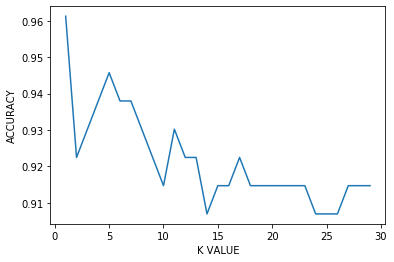

In [36]:
#Finding the best K with the highest accuracy
plt.plot(klist,score_list)
plt.xlabel('K VALUE')
plt.ylabel('ACCURACY')

Accuracy: 0.946
Precision: 0.933
Recall: 0.700
ROC: 0.845
F1 score: 0.800
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0]


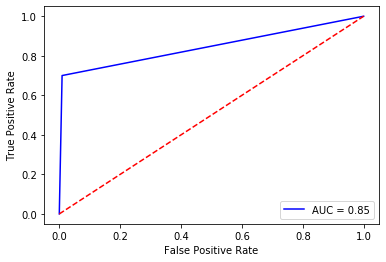

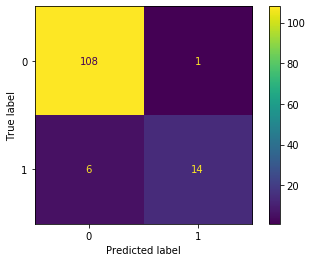

In [37]:
knn=KNeighborsClassifier(n_neighbors=5,weights="distance")
#Train the model using the training sets
knn.fit(Xtr, Ytr)
getScore(knn,Xval,Yval)

Accuracy: 0.923
Precision: 0.778
Recall: 0.467
ROC: 0.725
F1 score: 0.583
[0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


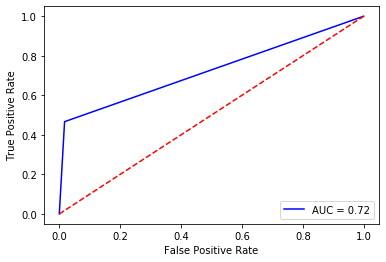

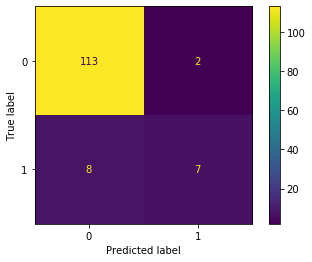

In [38]:
getScore(knn,Xts,Yts)

# Logistic Regression

Accuracy: 0.969
Precision: 0.900
Recall: 0.900
ROC: 0.941
F1 score: 0.900
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0]


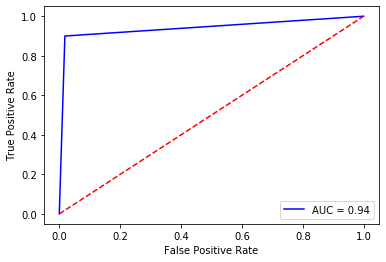

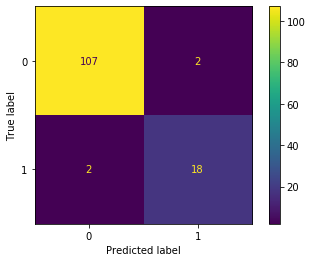

In [39]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state=0,solver='lbfgs',max_iter=1200000)
LogReg.fit(Xtr,Ytr)
getScore(LogReg,Xval,Yval)

Accuracy: 0.938
Precision: 0.818
Recall: 0.600
ROC: 0.791
F1 score: 0.692
[0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


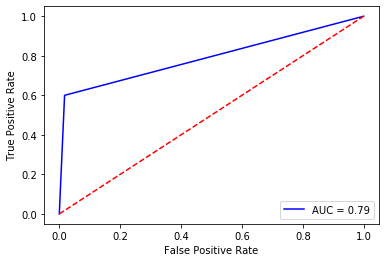

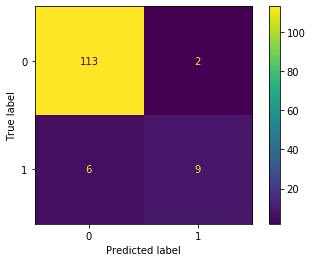

In [40]:
getScore(LogReg,Xts,Yts)

# Decision Tree

In [41]:
from sklearn import tree

depthlist=range(1,10)
depthscore={}
depthscore_list=[]
for depth in depthlist:
    clf=tree.DecisionTreeClassifier(max_depth=depth,random_state=0)
    clf.fit(Xtr, Ytr)
    y_pred = clf.predict(Xval)
    depthscore[depth]=metrics.accuracy_score(Yval, y_pred)
    depthscore_list.append(metrics.accuracy_score(Yval, y_pred))

Text(0, 0.5, 'ACCURACY')

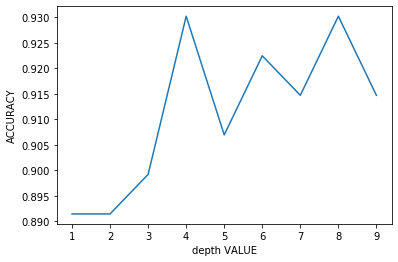

In [42]:
plt.plot(depthlist,depthscore_list)
plt.xlabel('depth VALUE')
plt.ylabel('ACCURACY')

Accuracy: 0.930
Precision: 0.824
Recall: 0.700
ROC: 0.836
F1 score: 0.757
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0]


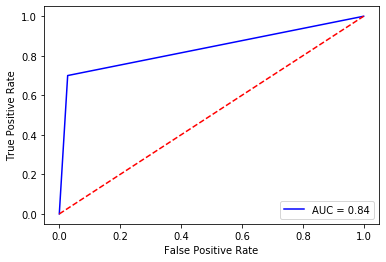

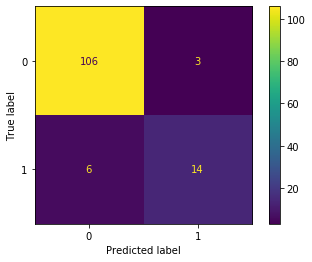

In [43]:
clf = tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf.fit(Xtr, Ytr)
getScore(clf,Xval,Yval)

Accuracy: 0.946
Precision: 0.900
Recall: 0.600
ROC: 0.796
F1 score: 0.720
[0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


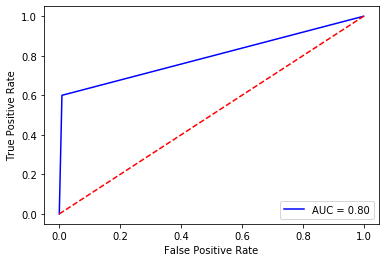

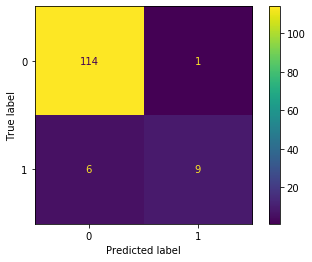

In [44]:
getScore(clf,Xts,Yts)

[Text(0.5217391304347826, 0.9, 'X[0] <= 70.5\ngini = 0.213\nsamples = 604\nvalue = [531, 73]'),
 Text(0.2826086956521739, 0.7, 'X[148] <= 0.5\ngini = 0.1\nsamples = 549\nvalue = [520, 29]'),
 Text(0.17391304347826086, 0.5, 'X[0] <= 59.5\ngini = 0.068\nsamples = 538\nvalue = [519, 19]'),
 Text(0.08695652173913043, 0.3, 'X[112] <= 0.5\ngini = 0.004\nsamples = 457\nvalue = [456, 1]'),
 Text(0.043478260869565216, 0.1, 'gini = 0.0\nsamples = 449\nvalue = [449, 0]'),
 Text(0.13043478260869565, 0.1, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.2608695652173913, 0.3, 'X[3] <= 3.5\ngini = 0.346\nsamples = 81\nvalue = [63, 18]'),
 Text(0.21739130434782608, 0.1, 'gini = 0.254\nsamples = 67\nvalue = [57, 10]'),
 Text(0.30434782608695654, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [6, 8]'),
 Text(0.391304347826087, 0.5, 'X[3] <= 2.0\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.34782608695652173, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.43478260869565216, 0.3, 'gi

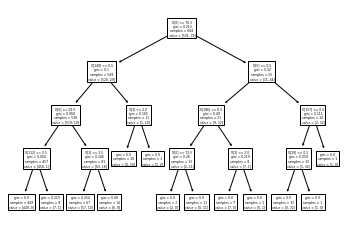

In [45]:
tree.plot_tree(clf)

# SVM

Accuracy: 0.915
Precision: 0.800
Recall: 0.600
ROC: 0.786
F1 score: 0.686
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0]


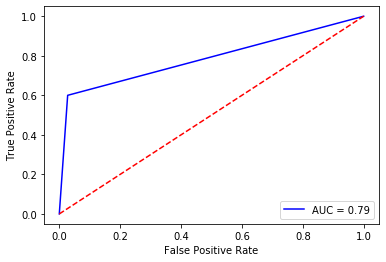

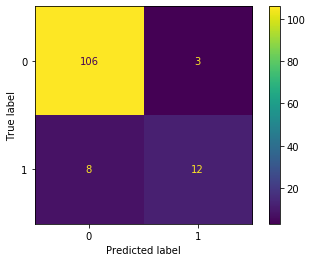

In [46]:
from sklearn import svm
SVMmodel = svm.SVC(random_state=0,gamma='auto')
SVMmodel.fit(Xtr,Ytr)
getScore(SVMmodel,Xval,Yval)

Accuracy: 0.923
Precision: 0.857
Recall: 0.400
ROC: 0.696
F1 score: 0.545
[0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


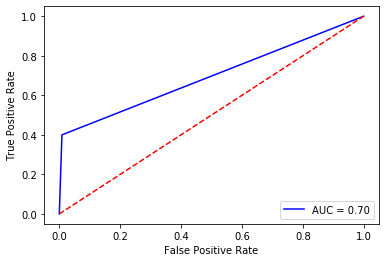

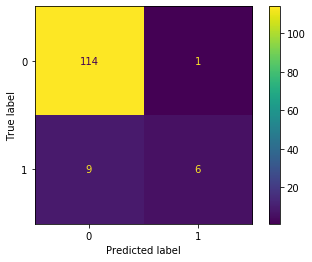

In [47]:
getScore(SVMmodel,Xts,Yts)

In [48]:
from sklearn.model_selection import GridSearchCV
svc = svm.SVC()
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': ['scale',1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
grid.fit(Xtr, Ytr)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.876 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.876 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.876 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.884 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.883 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.876 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.876 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.876 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.884 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.883 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.876 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.917 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.975 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.942 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.959 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.934 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.950 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.901 total time=   0.0s
[CV 4/5] END ....C=100, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [49]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


Accuracy: 0.977
Precision: 0.905
Recall: 0.950
ROC: 0.966
F1 score: 0.927
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0]


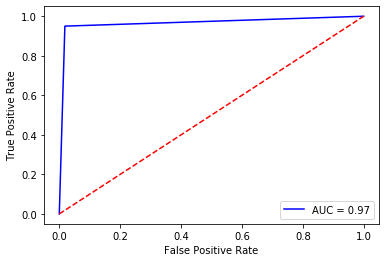

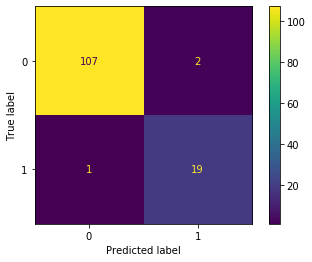

In [50]:
SVMmodel = svm.SVC(random_state=0,C=1000,gamma=0.01)
SVMmodel.fit(Xtr,Ytr)
getScore(SVMmodel,Xval,Yval)

Accuracy: 0.954
Precision: 0.846
Recall: 0.733
ROC: 0.858
F1 score: 0.786
[0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


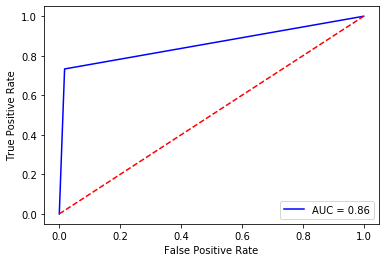

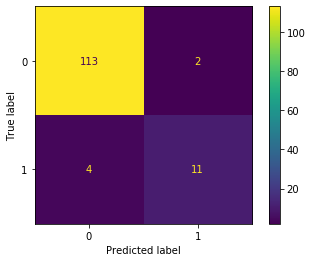

In [51]:
getScore(SVMmodel,Xts,Yts)

# Naiive Bayes Classifier

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xtr = scaler.fit_transform(Xtr)
Xts = scaler.fit_transform(Xts)
Xval=scaler.fit_transform(Xval)

Accuracy: 0.636
Precision: 0.299
Recall: 1.000
ROC: 0.784
F1 score: 0.460
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


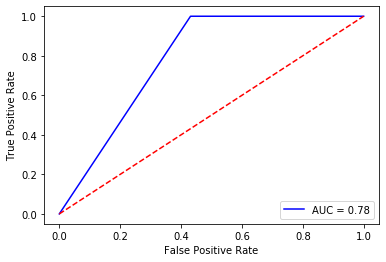

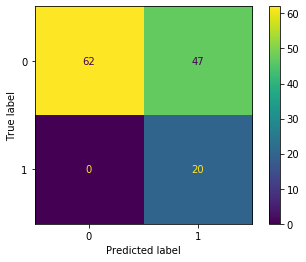

In [53]:
from sklearn.naive_bayes import ComplementNB
gnb = ComplementNB()
gnb.fit(Xtr,Ytr)
getScore(gnb,Xval,Yval)

Accuracy: 0.469
Precision: 0.163
Recall: 0.867
ROC: 0.642
F1 score: 0.274
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1]


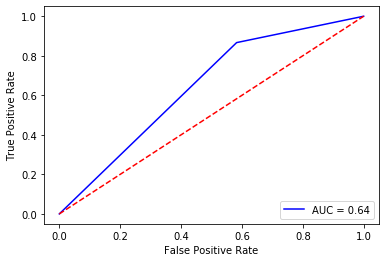

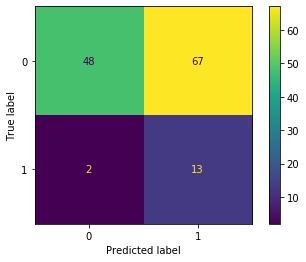

In [54]:
getScore(gnb,Xts,Yts)

In [55]:
res = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'Roc': roc_list,
    'F1score': f1score_list,
    'Model' : model_list
})
print(res)

    Accuracy  Precision    Recall       Roc   F1score  \
0   0.922481   0.812500  0.650000  0.811239  0.722222   
1   0.930769   1.000000  0.400000  0.700000  0.571429   
2   0.930233   1.000000  0.550000  0.775000  0.709677   
3   0.923077   0.857143  0.400000  0.695652  0.545455   
4   0.961240   0.941176  0.800000  0.895413  0.864865   
5   0.800000   0.322581  0.666667  0.742029  0.434783   
6   0.844961   0.000000  0.000000  0.500000  0.000000   
7   0.884615   0.000000  0.000000  0.500000  0.000000   
8   0.852713   0.517241  0.750000  0.810780  0.612245   
9   0.930769   0.800000  0.533333  0.757971  0.640000   
10  0.945736   0.933333  0.700000  0.845413  0.800000   
11  0.923077   0.777778  0.466667  0.724638  0.583333   
12  0.968992   0.900000  0.900000  0.940826  0.900000   
13  0.938462   0.818182  0.600000  0.791304  0.692308   
14  0.930233   0.823529  0.700000  0.836239  0.756757   
15  0.946154   0.900000  0.600000  0.795652  0.720000   
16  0.914729   0.800000  0.6000

Accuracy:-
LR: 0.893770 (0.059476)
Recall:-
LR: 0.162539 (0.162127)
Accuracy:-
KNN: 0.900464 (0.080365)
Recall:-
KNN: 0.368848 (0.239513)
Accuracy:-
Decision Tree: 0.937131 (0.035411)
Recall:-
Decision Tree: 0.591920 (0.228365)
Accuracy:-
NB: 0.712842 (0.196157)
Recall:-
NB: 0.340695 (0.359105)
Accuracy:-
SVM: 0.943607 (0.048918)
Recall:-
SVM: 0.694046 (0.280633)


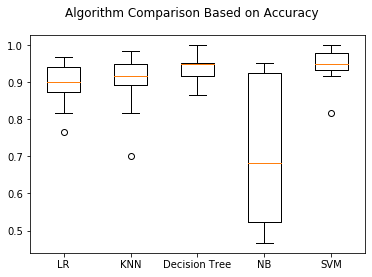

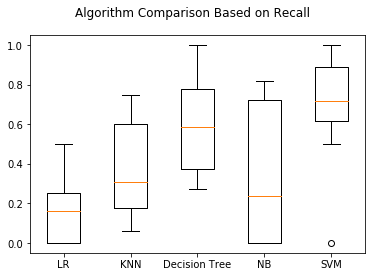

In [56]:
from sklearn import model_selection
results_Acc = []
results_Rec = []
names = []
models=[]
models.append(('LR', LogisticRegression(random_state=0,solver='lbfgs',max_iter=120000)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5,weights="distance")))
models.append(('Decision Tree', tree.DecisionTreeClassifier(max_depth=4)))
models.append(('NB', ComplementNB()))
models.append(('SVM', svm.SVC(random_state=0,C=1000,gamma=0.01)))
scoring = 'recall'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results_Accuracy = model_selection.cross_val_score(model, Xtr, Ytr, cv=kfold, scoring='accuracy')
    cv_results_Recall = model_selection.cross_val_score(model, Xtr, Ytr, cv=kfold, scoring='recall')
    results_Acc.append(cv_results_Accuracy)
    results_Rec.append(cv_results_Recall)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results_Accuracy.mean(), cv_results_Accuracy.std())
    
    msg2 = "%s: %f (%f)" % (name, cv_results_Recall.mean(), cv_results_Recall.std())
    print('Accuracy:-')
    print(msg)
    print('Recall:-')
    print(msg2)
fig = plt.figure()
fig.suptitle('Algorithm Comparison Based on Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results_Acc)
ax.set_xticklabels(names)
plt.show()

fig = plt.figure()
fig.suptitle('Algorithm Comparison Based on Recall')

ax = fig.add_subplot(111)
plt.boxplot(results_Rec)
ax.set_xticklabels(names)
plt.show()